In [4]:
from typing import Tuple
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

from colors import final_color, cv_color
from evaluation.serialization import Serializer

In [23]:
cv_final_metrics = Serializer.load("cv_metrics")
final_metrics = Serializer.load("final_metrics")

# Preserve label order
final_metrics["label"] = pd.Categorical(final_metrics["label"], ["overall", 'S', 'L', 'T', 'I', 'M', 'O'])
cv_final_metrics["label"] = pd.Categorical(cv_final_metrics["label"], ["overall", 'S', 'L', 'T', 'I', 'M', 'O'])

In [25]:
final_data = final_metrics\
    .query("kingdom == 'overall'")\
    .groupby(["metric", "label"])\
    .agg(["mean", "std"])\
    ["value"]

final_data["ci"] = 1.96 * final_data["std"]

In [26]:
cv_average_data = cv_final_metrics\
    .query("kingdom == 'overall'")\
    .groupby(["metric", "label"])\
    .agg(["mean", "std"])\
    ["value"]

cv_average_data["ci"] = 1.96 * cv_average_data["std"]

In [10]:
final_data.query("metric == 'mcc'")

mean       std        ci
metric label                              
mcc    S      0.864219  0.008637  0.016928
       T      0.881202  0.018597  0.036451
       L      0.900503  0.010243  0.020077
       I      0.942713  0.004301  0.008430
       M      0.772850  0.012801  0.025090
       O      0.915124  0.004955  0.009712

## Plot

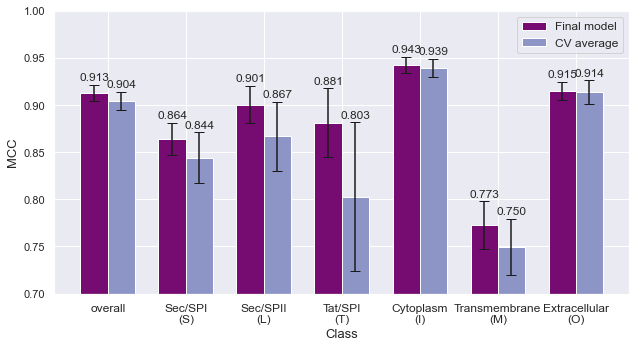

In [29]:
sns.set_theme()
matplotlib.rcParams.update({"errorbar.capsize": 5})
bar_width = 0.35
r1 = np.arange(7)
r2 = r1 + bar_width
fig = plt.figure()
final_values = plt.bar(
    r1,
    final_data.query("metric == 'mcc'")["mean"],
    yerr=final_data.query("metric == 'mcc'")["ci"],
    color=final_color,
    width=bar_width,
    label="Final model"
)

cv_values = plt.bar(
    r2,
    cv_average_data.query("metric == 'mcc'")["mean"],
    yerr=cv_average_data.query("metric == 'mcc'")["ci"],
    width=bar_width,
    label="CV average",
    color=cv_color
)

plt.gca().set_xlabel("Class", fontsize=13)
plt.gca().set_ylabel("MCC", fontsize=13)
plt.gca().set_xticks(r1 + 1/2 * bar_width)
plt.gca().set_xticklabels(["overall", "Sec/SPI\n(S)", "Sec/SPII\n(L)", "Tat/SPI\n(T)", "Cytoplasm\n(I)", "Transmembrane\n(M)", "Extracellular\n(O)"], fontsize=12)
plt.gca().bar_label(final_values, padding=2, fmt="%.3f")
plt.gca().bar_label(cv_values, padding=2, fmt="%.3f")
plt.gca().set_ylim([0.7, 1])

plt.legend(loc="upper right", fontsize=12)

fig.set_size_inches(9, 5)
fig.tight_layout()
fig.savefig("output/mcc_by_class", dpi=300)